# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

## Transaction Table

### Cleaning transaction table

In [ ]:
df_trans = pd.read_csv('D:\\Stop is just for LOSER\\Data\\Project\\Revou\\Datasets\\Dunnhumby\\transaction_data.csv')

In [ ]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


In [ ]:
df_trans.isnull().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [ ]:
duplicate = df_trans.duplicated()
print(duplicate.sum())
df_trans[duplicate]

0


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC


In [ ]:
df_trans.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06
mean,1.271953e+03,3.402620e+10,3.887562e+02,2.891435e+06,1.004286e+02,3.104120e+00,3.142673e+03,-5.387054e-01,1.561586e+03,5.622150e+01,-1.641600e-02,-2.918564e-03
std,7.260660e+02,4.711649e+09,1.897210e+02,3.837404e+06,1.153436e+03,4.182274e+00,8.937113e+03,1.249191e+00,3.998378e+02,2.710223e+01,2.168410e-01,3.969004e-02
min,1.000000e+00,2.698485e+10,1.000000e+00,2.567100e+04,0.000000e+00,0.000000e+00,1.000000e+00,-1.800000e+02,0.000000e+00,1.000000e+00,-5.593000e+01,-7.700000e+00
25%,6.560000e+02,3.040805e+10,2.290000e+02,9.174590e+05,1.000000e+00,1.290000e+00,3.300000e+02,-6.900000e-01,1.308000e+03,3.300000e+01,0.000000e+00,0.000000e+00
50%,1.272000e+03,3.276081e+10,3.900000e+02,1.028816e+06,1.000000e+00,2.000000e+00,3.720000e+02,-1.000000e-02,1.613000e+03,5.600000e+01,0.000000e+00,0.000000e+00
75%,1.913000e+03,4.012685e+10,5.530000e+02,1.133018e+06,1.000000e+00,3.490000e+00,4.220000e+02,0.000000e+00,1.843000e+03,8.000000e+01,0.000000e+00,0.000000e+00
max,2.500000e+03,4.230536e+10,7.110000e+02,1.831630e+07,8.963800e+04,8.400000e+02,3.428000e+04,3.990000e+00,2.359000e+03,1.020000e+02,0.000000e+00,0.000000e+00


In [ ]:
def plot_histograms(data, columns,kde=True):
    plt.figure(figsize=(20,16))

    for i, col in enumerate(columns, 1):
        plt.subplot(4,3,i)
        sns.histplot(data=data,x=data[col],kde=kde)

    plt.tight_layout()

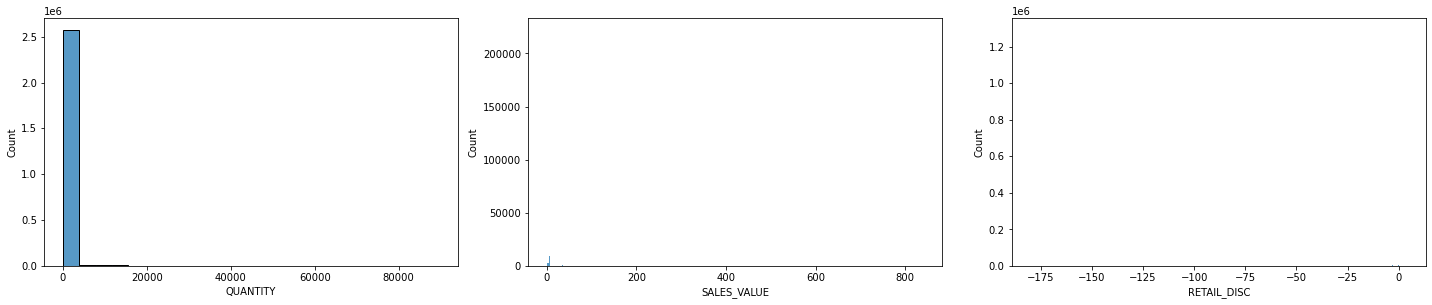

In [ ]:
plot_histograms(data=df_trans, columns=["QUANTITY","SALES_VALUE",'RETAIL_DISC'],kde=False)

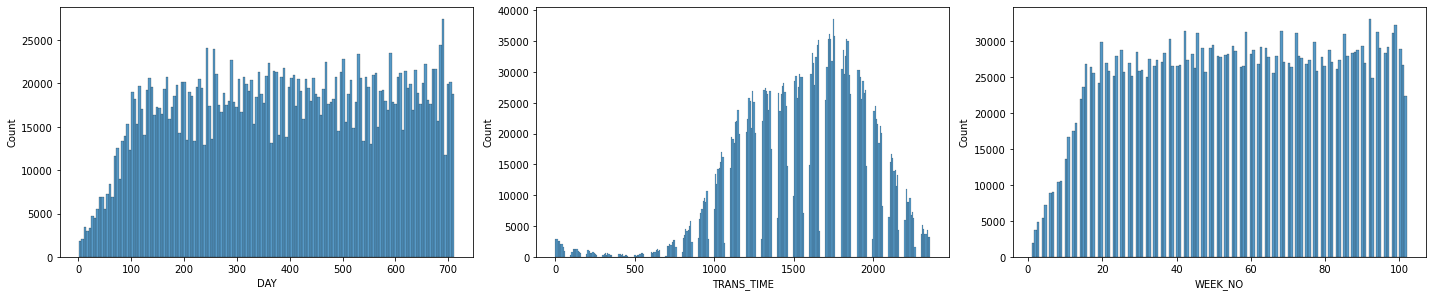

In [ ]:
plot_histograms(data=df_trans, columns=["DAY","TRANS_TIME","WEEK_NO"],kde=False)

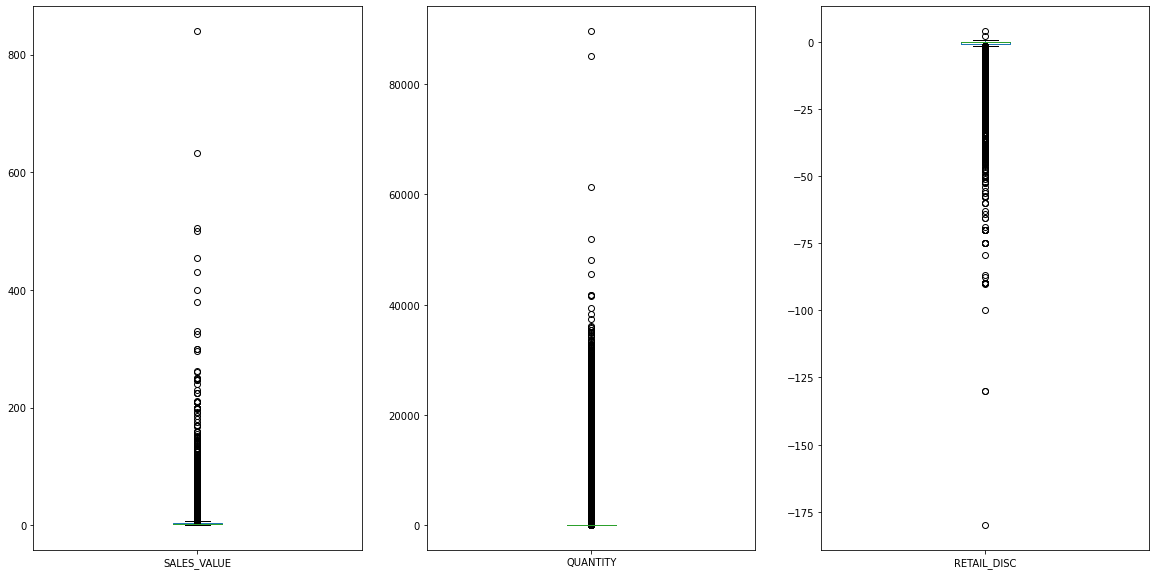

In [ ]:
for_cek = ['SALES_VALUE','QUANTITY','RETAIL_DISC']
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
for i,el in enumerate(for_cek):
    a = df_trans.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
potential_outlier_qty = sorted(df_trans["QUANTITY"], reverse=True)[:3]
potential_outlier_qty

[89638, 85055, 61335]

In [ ]:
df_trans = df_trans[df_trans['QUANTITY'] < 61335]

In [ ]:
df_trans['QUANTITY'].max()

51912

In [ ]:
df_trans = df_trans[df_trans['QUANTITY'] != 0]

In [ ]:
potential_outlier_sales = sorted(df_trans["SALES_VALUE"], reverse=True)[:2]
potential_outlier_sales

[840.0, 631.8]

In [ ]:
df_trans = df_trans[df_trans['SALES_VALUE'] < 631.8]

In [ ]:
df_trans['SALES_VALUE'].max()

505.0

In [ ]:
potential_outlier_disc = sorted(df_trans["RETAIL_DISC"], reverse=False)[:4]
potential_outlier_disc

[-180.0, -130.02, -129.98, -100.0]

In [ ]:
df_trans = df_trans[df_trans['RETAIL_DISC'] > -100.0]

In [ ]:
df_trans['RETAIL_DISC'].min()

-90.05

In [ ]:
df_trans.reset_index(drop=True, inplace=True)

In [ ]:
new_df = df_trans.copy()

In [ ]:
new_df['YEAR'] = [2017 if x < 366 else 2018 for x in new_df['DAY']]

In [ ]:
new_df['DAY_NUM'] = new_df['DAY'].apply(lambda x: x - 365 if x > 365 else x)

In [ ]:
new_df['DAY_NUM'] = new_df['DAY_NUM'].astype(str)

In [ ]:
new_df['YEAR'] = new_df['YEAR'].astype(str)

In [ ]:
day_num = new_df['DAY_NUM']

In [ ]:
year = new_df['YEAR']

In [ ]:
new_df['DATE'] = year + "-" + day_num

In [ ]:
year_list = ['2017', '2018']

In [ ]:
new_df['DATE'] = new_df['DATE'].apply(lambda x :datetime.strptime(x, "%Y-%j"))

In [ ]:
new_df['DAYS'] = new_df['DATE'].apply(lambda x: datetime.strftime(x, "%A"))

In [ ]:
new_df['MONTH'] = new_df['DATE'].apply(lambda x: datetime.strftime(x, "%Y-%m (%B)"))

In [ ]:
new_df['TRANS_TIME'] = new_df['TRANS_TIME']/100

In [ ]:
new_df['TRANS_TIME'] = new_df['TRANS_TIME'].astype(np.int64)

In [ ]:
new_df['DAY_CATEGORY'] = new_df['DATE'].dt.dayofweek

new_df['DAY_CATEGORY'] = ['weekday' if x < 5 else 'weekend' for x in new_df['DAY_CATEGORY']]

In [ ]:
def condition(x):
    if x>=6 and x<=18:
        return "Day"
    else:
        return 'Night'

In [ ]:
new_df['TIME_CATEGORY'] = new_df['TRANS_TIME'].apply(condition)

In [ ]:
def conditions(x):
    if x>=4 and x<=9:
        return "morning"
    elif x>=10 and x<=15:
        return "afternoon"
    elif x>=16 and x<=21:
        return "evening"
    else:
        return 'night'

In [ ]:
new_df['TIMES_CATEGORY'] = new_df['TRANS_TIME'].apply(conditions)

In [ ]:
new_df

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,YEAR,DAY_NUM,DATE,DAYS,MONTH,DAY_CATEGORY,TIME_CATEGORY,TIMES_CATEGORY
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,16,1,0.0,0.0,2017,1,2017-01-01,Sunday,2017-01 (January),weekend,Day,evening
1,2375,26984851472,1,1033142,1,0.82,364,0.00,16,1,0.0,0.0,2017,1,2017-01-01,Sunday,2017-01 (January),weekend,Day,evening
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,16,1,0.0,0.0,2017,1,2017-01-01,Sunday,2017-01 (January),weekend,Day,evening
3,2375,26984851472,1,1082185,1,1.21,364,0.00,16,1,0.0,0.0,2017,1,2017-01-01,Sunday,2017-01 (January),weekend,Day,evening
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,16,1,0.0,0.0,2017,1,2017-01-01,Sunday,2017-01 (January),weekend,Day,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581252,1598,42305362535,711,92130,1,0.99,3228,0.00,15,102,0.0,0.0,2018,346,2018-12-12,Wednesday,2018-12 (December),weekday,Day,afternoon
2581253,1598,42305362535,711,114102,1,8.89,3228,0.00,15,102,0.0,0.0,2018,346,2018-12-12,Wednesday,2018-12 (December),weekday,Day,afternoon
2581254,1598,42305362535,711,133449,1,6.99,3228,0.00,15,102,0.0,0.0,2018,346,2018-12-12,Wednesday,2018-12 (December),weekday,Day,afternoon
2581255,1598,42305362535,711,6923644,1,4.50,3228,-0.49,15,102,0.0,0.0,2018,346,2018-12-12,Wednesday,2018-12 (December),weekday,Day,afternoon


## Adding product table

In [ ]:
df_product = pd.read_csv('D:\\Stop is just for LOSER\\Data\\Project\\Revou\\Datasets\\Dunnhumby\\product.csv')

In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92353 non-null  object
 5   SUB_COMMODITY_DESC    92353 non-null  object
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


In [ ]:
df_product.isnull().sum()

PRODUCT_ID              0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

In [ ]:
liat = df_product[df_product['DEPARTMENT'] == ' ']
liat

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
52189,5126087,1,,National,,,
52190,5126088,1,,National,,,
52191,5126106,1,,National,,,
52192,5126107,1,,National,,,
55048,5977100,1,,National,,,
55054,5978648,1,,National,,,
55055,5978649,1,,National,,,
55056,5978650,1,,National,,,
55057,5978656,1,,National,,,
55058,5978657,1,,National,,,


In [ ]:
df_product = df_product[df_product['DEPARTMENT'] != " "]
df_product

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,


In [ ]:
df = new_df.merge(df_product, how='left', left_on='PRODUCT_ID', right_on='PRODUCT_ID')
df

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,MONTH,DAY_CATEGORY,TIME_CATEGORY,TIMES_CATEGORY,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,16,1,...,2017-01 (January),weekend,Day,evening,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,16,1,...,2017-01 (January),weekend,Day,evening,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,16,1,...,2017-01 (January),weekend,Day,evening,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,16,1,...,2017-01 (January),weekend,Day,evening,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,16,1,...,2017-01 (January),weekend,Day,evening,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581252,1598,42305362535,711,92130,1,0.99,3228,0.00,15,102,...,2018-12 (December),weekday,Day,afternoon,560,GROCERY,National,MARGARINES,MARGARINE: TUBS AND BOWLS,16 OZ
2581253,1598,42305362535,711,114102,1,8.89,3228,0.00,15,102,...,2018-12 (December),weekday,Day,afternoon,2398,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ
2581254,1598,42305362535,711,133449,1,6.99,3228,0.00,15,102,...,2018-12 (December),weekday,Day,afternoon,2468,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ
2581255,1598,42305362535,711,6923644,1,4.50,3228,-0.49,15,102,...,2018-12 (December),weekday,Day,afternoon,2390,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,4PK/10 OZ


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2581257 entries, 0 to 2581256
Data columns (total 26 columns):
 #   Column                Dtype         
---  ------                -----         
 0   household_key         int64         
 1   BASKET_ID             int64         
 2   DAY                   int64         
 3   PRODUCT_ID            int64         
 4   QUANTITY              int64         
 5   SALES_VALUE           float64       
 6   STORE_ID              int64         
 7   RETAIL_DISC           float64       
 8   TRANS_TIME            int64         
 9   WEEK_NO               int64         
 10  COUPON_DISC           float64       
 11  COUPON_MATCH_DISC     float64       
 12  YEAR                  object        
 13  DAY_NUM               object        
 14  DATE                  datetime64[ns]
 15  DAYS                  object        
 16  MONTH                 object        
 17  DAY_CATEGORY          object        
 18  TIME_CATEGORY         object        
 19  

## Adding Coupon and Campaign

In [ ]:
coupon_desc = pd.read_csv('D:\\Stop is just for LOSER\\Data\\Project\\Revou\\Datasets\\Dunnhumby\\coupon.csv')

In [ ]:
coupon_redempt = pd.read_csv('D:\\Stop is just for LOSER\\Data\\Project\\Revou\\Datasets\\Dunnhumby\\coupon_redempt.csv')

In [ ]:
coupon = coupon_redempt.merge(coupon_desc, how='left', left_on=['COUPON_UPC', 'CAMPAIGN'], right_on=['COUPON_UPC', 'CAMPAIGN'])
coupon

,household_key,DAY,COUPON_UPC,CAMPAIGN,PRODUCT_ID
0,1,421,10000085364,8,100512
1,1,421,10000085364,8,527731
2,1,421,10000085364,8,1054539
3,1,421,10000085364,8,802268
4,1,421,10000085364,8,846907
...,...,...,...,...,...
2198357,2500,624,55000013950,18,10118758
2198358,2500,624,55000013950,18,9676938
2198359,2500,624,55000013950,18,9676546
2198360,2500,624,55000013950,18,10118759


In [ ]:
campaign_desc = pd.read_csv('D:\\Stop is just for LOSER\\Data\\Project\\Revou\\Datasets\\Dunnhumby\\campaign_desc.csv')

In [ ]:
coupons = coupon.merge(campaign_desc, how='left', left_on=['CAMPAIGN'], right_on=['CAMPAIGN'])
coupons

,household_key,DAY,COUPON_UPC,CAMPAIGN,PRODUCT_ID,DESCRIPTION,START_DAY,END_DAY
0,1,421,10000085364,8,100512,TypeA,412,460
1,1,421,10000085364,8,527731,TypeA,412,460
2,1,421,10000085364,8,1054539,TypeA,412,460
3,1,421,10000085364,8,802268,TypeA,412,460
4,1,421,10000085364,8,846907,TypeA,412,460
...,...,...,...,...,...,...,...,...
2198357,2500,624,55000013950,18,10118758,TypeA,587,642
2198358,2500,624,55000013950,18,9676938,TypeA,587,642
2198359,2500,624,55000013950,18,9676546,TypeA,587,642
2198360,2500,624,55000013950,18,10118759,TypeA,587,642


In [ ]:
coupons = coupons.drop(['START_DAY', 'END_DAY'], axis=1)

In [ ]:
coupons.head()

,household_key,DAY,COUPON_UPC,CAMPAIGN,PRODUCT_ID,DESCRIPTION
0,1,421,10000085364,8,100512,TypeA
1,1,421,10000085364,8,527731,TypeA
2,1,421,10000085364,8,1054539,TypeA
3,1,421,10000085364,8,802268,TypeA
4,1,421,10000085364,8,846907,TypeA


In [ ]:
df_final = df.merge(coupons, how='left', left_on=['household_key', 'DAY', 'PRODUCT_ID'], right_on=['household_key', 'DAY', 'PRODUCT_ID'])

In [ ]:
df_final['CAMPAIGN'] = df_final['CAMPAIGN'].fillna('-')
df_final['COUPON_UPC'] = df_final['COUPON_UPC'].fillna('-')
df_final['DESCRIPTION'] = df_final['DESCRIPTION'].fillna('-')

In [ ]:
df_final['CAMPAIGN'] = df_final['CAMPAIGN'].astype(str)
df_final['COUPON_UPC'] = df_final['COUPON_UPC'].astype(str)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2581439 entries, 0 to 2581438
Data columns (total 29 columns):
 #   Column                Dtype         
---  ------                -----         
 0   household_key         int64         
 1   BASKET_ID             int64         
 2   DAY                   int64         
 3   PRODUCT_ID            int64         
 4   QUANTITY              int64         
 5   SALES_VALUE           float64       
 6   STORE_ID              int64         
 7   RETAIL_DISC           float64       
 8   TRANS_TIME            int64         
 9   WEEK_NO               int64         
 10  COUPON_DISC           float64       
 11  COUPON_MATCH_DISC     float64       
 12  YEAR                  object        
 13  DAY_NUM               object        
 14  DATE                  datetime64[ns]
 15  DAYS                  object        
 16  MONTH                 object        
 17  DAY_CATEGORY          object        
 18  TIME_CATEGORY         object        
 19  

In [ ]:
duplicates = df_final.duplicated()
print(duplicates.sum())

86


In [ ]:
df_final = df_final.drop_duplicates()
df_final

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,TIMES_CATEGORY,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,COUPON_UPC,CAMPAIGN,DESCRIPTION
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,16,1,...,evening,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,-,-,-
1,2375,26984851472,1,1033142,1,0.82,364,0.00,16,1,...,evening,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB,-,-,-
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,16,1,...,evening,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,,-,-,-
3,2375,26984851472,1,1082185,1,1.21,364,0.00,16,1,...,evening,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,-,-,-
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,16,1,...,evening,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581434,1598,42305362535,711,92130,1,0.99,3228,0.00,15,102,...,afternoon,560,GROCERY,National,MARGARINES,MARGARINE: TUBS AND BOWLS,16 OZ,-,-,-
2581435,1598,42305362535,711,114102,1,8.89,3228,0.00,15,102,...,afternoon,2398,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ,-,-,-
2581436,1598,42305362535,711,133449,1,6.99,3228,0.00,15,102,...,afternoon,2468,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ,-,-,-
2581437,1598,42305362535,711,6923644,1,4.50,3228,-0.49,15,102,...,afternoon,2390,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,4PK/10 OZ,-,-,-


## Defining Store Which is Perform and Not

In [ ]:
store = df_final.groupby('STORE_ID').agg({'household_key' : lambda x: x.nunique(),
                                       'SALES_VALUE' : 'sum', 'QUANTITY' : 'sum',
                                       'RETAIL_DISC' : 'sum'}).rename(columns={'household_key':'total_customer'}).sort_values(['SALES_VALUE', 'QUANTITY', 'RETAIL_DISC'], ascending=False)
store = store.reset_index()
store

,STORE_ID,total_customer,SALES_VALUE,QUANTITY,RETAIL_DISC
0,367,264,267625.23,12743477,-33589.30
1,406,134,216788.75,16044216,-29704.88
2,361,98,144698.84,9012499,-21779.14
3,429,99,142391.01,16860489,-16975.60
4,343,237,140471.75,9582414,-22851.46
...,...,...,...,...,...
577,2760,1,1.00,2,-1.78
578,639,1,0.85,2,-0.18
579,256,1,0.76,1,0.00
580,610,1,0.50,1,-0.39


In [ ]:
store['cumpercent'] = (store['SALES_VALUE'].cumsum()/store['SALES_VALUE'].sum()*100).round(2)
store

,STORE_ID,total_customer,SALES_VALUE,QUANTITY,RETAIL_DISC,cumpercent
0,367,264,267625.23,12743477,-33589.30,3.32
1,406,134,216788.75,16044216,-29704.88,6.01
2,361,98,144698.84,9012499,-21779.14,7.81
3,429,99,142391.01,16860489,-16975.60,9.58
4,343,237,140471.75,9582414,-22851.46,11.32
...,...,...,...,...,...,...
577,2760,1,1.00,2,-1.78,100.00
578,639,1,0.85,2,-0.18,100.00
579,256,1,0.76,1,0.00,100.00
580,610,1,0.50,1,-0.39,100.00


In [ ]:
store_perform = store[store['cumpercent'] < 81]
store_perform

,STORE_ID,total_customer,SALES_VALUE,QUANTITY,RETAIL_DISC,cumpercent
0,367,264,267625.23,12743477,-33589.30,3.32
1,406,134,216788.75,16044216,-29704.88,6.01
2,361,98,144698.84,9012499,-21779.14,7.81
3,429,99,142391.01,16860489,-16975.60,9.58
4,343,237,140471.75,9582414,-22851.46,11.32
...,...,...,...,...,...,...
66,370,62,57139.92,3035381,-11728.38,77.69
67,442,72,56885.37,22921,-8980.72,78.40
68,404,91,55931.44,1201603,-10011.56,79.09
69,445,175,55123.77,27307,-10775.76,79.77


In [ ]:
store_underperform = store[store['cumpercent'] > 81]
store_underperform

,STORE_ID,total_customer,SALES_VALUE,QUANTITY,RETAIL_DISC,cumpercent
71,306,72,52117.34,24934,-13748.73,81.08
72,338,103,51468.44,21247,-7048.00,81.72
73,448,111,50964.38,20917,-7584.60,82.35
74,436,64,50734.84,25636,-11876.26,82.98
75,289,118,50636.70,25813,-10136.02,83.61
...,...,...,...,...,...,...
577,2760,1,1.00,2,-1.78,100.00
578,639,1,0.85,2,-0.18,100.00
579,256,1,0.76,1,0.00,100.00
580,610,1,0.50,1,-0.39,100.00


In [ ]:
from matplotlib.ticker import PercentFormatter

<function matplotlib.pyplot.show(close=None, block=None)>

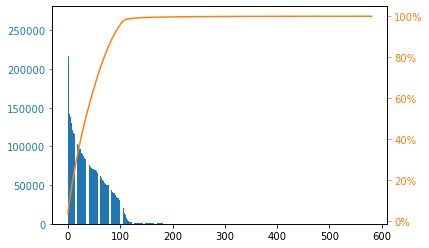

In [ ]:
fig, ax = plt.subplots()
ax.bar(store.index, store['SALES_VALUE'], color='C0')
ax2 = ax.twinx()
ax2.plot(store.index, store['cumpercent'], color='C1')
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis='y', colors='C0')
ax2.tick_params(axis='y', colors='C1')
plt.show

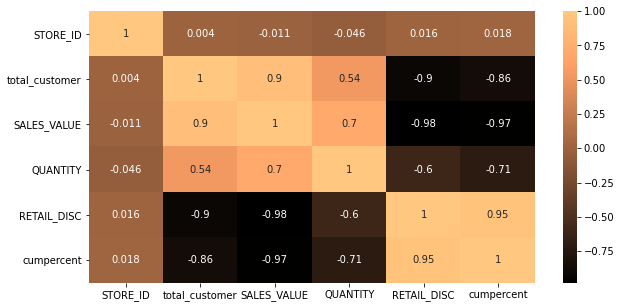

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.heatmap(store.corr(), cmap = 'copper', annot = True)

plt.show()

## The most traffic time of buying

In [ ]:
week = df_final.groupby([df_final['DAY'], df_final['DAY_CATEGORY']]).agg({'household_key': lambda x: x.nunique()}).rename(columns={'household_key':'total_customer'}).sort_values(['total_customer'], ascending=False)
week

,,total_customer
DAY,DAY_CATEGORY,
246,weekend,521
610,weekend,507
641,weekday,489
692,weekday,487
284,weekday,479
...,...,...
5,weekday,23
1,weekend,13
2,weekday,12


In [ ]:
weeks = week.groupby('DAY_CATEGORY').agg({'total_customer': 'sum'}).sort_values(['total_customer'], ascending=False)
weeks['percent_cust'] = weeks['total_customer'].apply(lambda x: (x / weeks['total_customer'].sum())*100).round(2)
weeks

,total_customer,percent_cust
DAY_CATEGORY,,
weekday,164278,72.9
weekend,61065,27.1


In [ ]:
week_time = df_final.groupby([df_final['DAY'], df_final['DAY_CATEGORY'], df_final['TIME_CATEGORY']]).agg({'household_key': lambda x: x.nunique()}).rename(columns={'household_key':'total_customer'}).sort_values(['total_customer'], ascending=False)
week_time

,,,total_customer
DAY,DAY_CATEGORY,TIME_CATEGORY,
684,weekday,Day,409
642,weekday,Day,409
284,weekday,Day,406
277,weekday,Day,395
641,weekday,Day,385
...,...,...,...
2,weekday,Day,6
5,weekday,Night,4
1,weekend,Night,4


In [ ]:
week_times = week_time.groupby(['DAY_CATEGORY', 'TIME_CATEGORY']).agg({'total_customer': 'sum'}).sort_values(['total_customer'], ascending=False)
week_times['percent_cust'] = week_times['total_customer'].apply(lambda x: (x / week_times['total_customer'].sum())*100).round(2)
week_times = week_times.reset_index()
week_times

,DAY_CATEGORY,TIME_CATEGORY,total_customer,percent_cust
0,weekday,Day,126812,53.87
1,weekend,Day,46037,19.56
2,weekday,Night,44945,19.09
3,weekend,Night,17599,7.48


In [ ]:
day = df_final.groupby([df_final['DAY'], df_final['DAYS']]).agg({'household_key': lambda x: x.nunique()}).rename(columns={'household_key':'total_customer'})
day

,,total_customer
DAY,DAYS,
1,Sunday,13
2,Monday,12
3,Tuesday,33
4,Wednesday,36
5,Thursday,23
...,...,...
707,Saturday,310
708,Sunday,315
709,Monday,317


In [ ]:
days = day.groupby(by='DAYS')['total_customer'].sum().reset_index(name='total_customer').sort_values(['total_customer'], ascending=False)
days['percent_cust'] = days['total_customer'].apply(lambda x: (x / week_times['total_customer'].sum())*100).round(2)
days

,DAYS,total_customer,percent_cust
4,Thursday,35326,15.01
6,Wednesday,35250,14.97
0,Friday,31881,13.54
5,Tuesday,31434,13.35
2,Saturday,30644,13.02
3,Sunday,30421,12.92
1,Monday,30387,12.91


In [ ]:
time = df_final.groupby([df_final['DAY'], df_final['TIMES_CATEGORY']]).agg({'household_key': lambda x: x.nunique()}).rename(columns={'household_key':'total_customer'}).sort_values(['total_customer'], ascending=False)
time

,,total_customer
DAY,TIMES_CATEGORY,
246,evening,299
277,afternoon,279
642,afternoon,270
692,evening,269
684,afternoon,260
...,...,...
9,night,1
13,morning,1
643,night,1


In [ ]:
times = time.groupby('TIMES_CATEGORY').agg({'total_customer': 'sum'}).sort_values(['total_customer'], ascending=False)
times['percent_cust'] = times['total_customer'].apply(lambda x: (x / times['total_customer'].sum())*100).round(2)
times = times.reset_index()
times

,TIMES_CATEGORY,total_customer,percent_cust
0,evening,114009,47.06
1,afternoon,93864,38.75
2,morning,18906,7.80
3,night,15459,6.38


# Find an effective campaign

In [ ]:
df_final.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,TIMES_CATEGORY,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,COUPON_UPC,CAMPAIGN,DESCRIPTION
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,16,1,...,evening,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,-,-,-
1,2375,26984851472,1,1033142,1,0.82,364,0.00,16,1,...,evening,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB,-,-,-
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,16,1,...,evening,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,,-,-,-
3,2375,26984851472,1,1082185,1,1.21,364,0.00,16,1,...,evening,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,-,-,-
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,16,1,...,evening,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB,-,-,-


### Customer received campaign

In [ ]:
to_campaign_table = df_final.groupby('household_key').agg({'PRODUCT_ID':lambda x: x.nunique()}).rename(columns={'PRODUCT_ID':'total_product'})
to_campaign_table = to_campaign_table.reset_index()

In [ ]:
campaign_table = pd.read_csv('D:\\Stop is just for LOSER\\Data\\Project\\Revou\\Datasets\\Dunnhumby\\campaign_table.csv')

In [ ]:
customer_received = campaign_table.merge(to_campaign_table, how='inner', left_on='household_key', right_on='household_key')
customer_received = customer_received.drop(['total_product'], axis=1)

In [ ]:
customer_receiveds = customer_received.groupby(['CAMPAIGN', 'DESCRIPTION']).agg({'household_key':lambda x: x.nunique()}).rename(columns={'household_key':'total_customer_receive'})
customer_receiveds = customer_receiveds.reset_index()
customer_receiveds

,CAMPAIGN,DESCRIPTION,total_customer_receive
0,1,TypeB,13
1,2,TypeB,48
2,3,TypeC,12
3,4,TypeB,81
4,5,TypeB,166
5,6,TypeC,65
6,7,TypeB,198
7,8,TypeA,1076
8,9,TypeB,176
9,10,TypeB,123


### Distributed coupons and products

In [ ]:
coupon_merge = coupon_desc.merge(campaign_desc, how='left', left_on='CAMPAIGN', right_on='CAMPAIGN')
coupon_merge['DAY_RUNNING'] = coupon_merge['END_DAY'] - coupon_merge['START_DAY']
coupon_merge = coupon_merge.drop(['START_DAY', 'END_DAY'], axis=1)

In [ ]:
distributed_coupons = coupon_merge.groupby(['CAMPAIGN',
                                            'DESCRIPTION','DAY_RUNNING']).agg({'COUPON_UPC':lambda x: x.nunique(),
                                                                 'PRODUCT_ID':lambda x: x.nunique()}).rename(columns={'COUPON_UPC':'total_coupons','PRODUCT_ID':'total_product'})
distributed_coupons = distributed_coupons.reset_index()
distributed_coupons

,CAMPAIGN,DESCRIPTION,DAY_RUNNING,total_coupons,total_product
0,1,TypeB,37,11,383
1,2,TypeB,32,16,301
2,3,TypeC,56,34,506
3,4,TypeB,32,12,200
4,5,TypeB,34,11,443
5,6,TypeC,32,1,18
6,7,TypeB,34,8,259
7,8,TypeA,48,209,17178
8,9,TypeB,32,18,825
9,10,TypeB,32,14,393


### Distributed customers, coupons and products based on campaign

In [ ]:
distributed_campaign = distributed_coupons.merge(customer_receiveds, how='left',
                                                 left_on=['CAMPAIGN','DESCRIPTION'],
                                                right_on=['CAMPAIGN','DESCRIPTION'])
distributed_campaign

,CAMPAIGN,DESCRIPTION,DAY_RUNNING,total_coupons,total_product,total_customer_receive
0,1,TypeB,37,11,383,13
1,2,TypeB,32,16,301,48
2,3,TypeC,56,34,506,12
3,4,TypeB,32,12,200,81
4,5,TypeB,34,11,443,166
5,6,TypeC,32,1,18,65
6,7,TypeB,34,8,259,198
7,8,TypeA,48,209,17178,1076
8,9,TypeB,32,18,825,176
9,10,TypeB,32,14,393,123


### Customer who redempt coupons

In [ ]:
all_redempts = df_final.groupby(['CAMPAIGN','DESCRIPTION']).agg({'household_key':lambda x: x.nunique(),
                                                                  'COUPON_UPC':lambda x: x.nunique(),
                                                                  'PRODUCT_ID':lambda x: x.nunique()}).rename(columns={'household_key':'total_customers_redempt',
                                                                                                                       'COUPON_UPC':'total_coupons_redempt',
                                                                                                                       'PRODUCT_ID':'total_products_redempt'})
all_redempts = all_redempts.reset_index()
all_redempts = all_redempts[(all_redempts['CAMPAIGN'] != '-') & (all_redempts['DESCRIPTION'] != '-')]
all_redempts

,CAMPAIGN,DESCRIPTION,total_customers_redempt,total_coupons_redempt,total_products_redempt
1,1.0,TypeB,1,1,3
2,10.0,TypeB,6,6,10
3,11.0,TypeB,5,4,9
4,12.0,TypeB,11,9,15
5,13.0,TypeA,190,119,954
6,14.0,TypeC,17,10,38
7,15.0,TypeC,2,2,3
8,16.0,TypeB,13,10,32
9,17.0,TypeB,18,13,45
10,18.0,TypeA,209,113,1003


## Metrics Converted Rate (CR)

In [ ]:
distributed_campaign.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CAMPAIGN                30 non-null     int64 
 1   DESCRIPTION             30 non-null     object
 2   DAY_RUNNING             30 non-null     int64 
 3   total_coupons           30 non-null     int64 
 4   total_product           30 non-null     int64 
 5   total_customer_receive  30 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.6+ KB


In [ ]:
all_redempts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CAMPAIGN                 30 non-null     object
 1   DESCRIPTION              30 non-null     object
 2   total_customers_redempt  30 non-null     int64 
 3   total_coupons_redempt    30 non-null     int64 
 4   total_products_redempt   30 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.4+ KB


In [ ]:
all_redempts['CAMPAIGN'] = all_redempts['CAMPAIGN'].str.replace('.0','',regex=False)
all_redempts['CAMPAIGN'] = all_redempts['CAMPAIGN'].astype(np.int64)

In [ ]:
campaign_converted_rate = distributed_campaign.merge(all_redempts, how='left',
                                              left_on=['CAMPAIGN','DESCRIPTION'],
                                             right_on=['CAMPAIGN','DESCRIPTION'])
campaign_converted_rate = campaign_converted_rate.fillna(0)

In [ ]:
campaign_converted_rate['total_customers_redempt'] = campaign_converted_rate['total_customers_redempt'].astype(np.int64)
campaign_converted_rate['total_coupons_redempt'] = campaign_converted_rate['total_coupons_redempt'].astype(np.int64)
campaign_converted_rate['total_products_redempt'] = campaign_converted_rate['total_products_redempt'].astype(np.int64)

In [ ]:
campaign_converted_rate['customers_converted'] = ((campaign_converted_rate['total_customers_redempt']/campaign_converted_rate['total_customer_receive'])*100).round(2)
campaign_converted_rate['coupons_converted'] = ((campaign_converted_rate['total_coupons_redempt']/campaign_converted_rate['total_coupons'])*100).round(2)
campaign_converted_rate['products_converted'] = ((campaign_converted_rate['total_products_redempt']/campaign_converted_rate['total_product'])*100).round(2)
campaign_converted_rate

,CAMPAIGN,DESCRIPTION,DAY_RUNNING,total_coupons,total_product,total_customer_receive,total_customers_redempt,total_coupons_redempt,total_products_redempt,customers_converted,coupons_converted,products_converted
0,1,TypeB,37,11,383,13,1,1,3,7.69,9.09,0.78
1,2,TypeB,32,16,301,48,2,4,7,4.17,25.00,2.33
2,3,TypeC,56,34,506,12,2,2,3,16.67,5.88,0.59
3,4,TypeB,32,12,200,81,5,5,8,6.17,41.67,4.00
4,5,TypeB,34,11,443,166,6,4,18,3.61,36.36,4.06
5,6,TypeC,32,1,18,65,1,1,2,1.54,100.00,11.11
6,7,TypeB,34,8,259,198,4,4,5,2.02,50.00,1.93
7,8,TypeA,48,209,17178,1076,149,95,495,13.85,45.45,2.88
8,9,TypeB,32,18,825,176,17,13,47,9.66,72.22,5.70
9,10,TypeB,32,14,393,123,6,6,10,4.88,42.86,2.54


## Metrics ROI

In [ ]:
df_final.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,TIMES_CATEGORY,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,COUPON_UPC,CAMPAIGN,DESCRIPTION
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,16,1,...,evening,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,-,-,-
1,2375,26984851472,1,1033142,1,0.82,364,0.00,16,1,...,evening,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB,-,-,-
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,16,1,...,evening,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,,-,-,-
3,2375,26984851472,1,1082185,1,1.21,364,0.00,16,1,...,evening,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,-,-,-
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,16,1,...,evening,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB,-,-,-


In [ ]:
ROI = df_final.copy()

In [ ]:
ROI = ROI[['SALES_VALUE', 'RETAIL_DISC', 'CAMPAIGN', 'DESCRIPTION']]
ROI

,SALES_VALUE,RETAIL_DISC,CAMPAIGN,DESCRIPTION
0,1.39,-0.60,-,-
1,0.82,0.00,-,-
2,0.99,-0.30,-,-
3,1.21,0.00,-,-
4,1.50,-0.39,-,-
...,...,...,...,...
2581434,0.99,0.00,-,-
2581435,8.89,0.00,-,-
2581436,6.99,0.00,-,-
2581437,4.50,-0.49,-,-


In [ ]:
ROI['RETAIL_DISC'] = ROI['RETAIL_DISC'].astype(str)
ROI['RETAIL_DISC'] = ROI['RETAIL_DISC'].str.replace('-','',regex=False)
ROI['RETAIL_DISC'] = ROI['RETAIL_DISC'].astype(float)
ROI

,SALES_VALUE,RETAIL_DISC,CAMPAIGN,DESCRIPTION
0,1.39,0.60,-,-
1,0.82,0.00,-,-
2,0.99,0.30,-,-
3,1.21,0.00,-,-
4,1.50,0.39,-,-
...,...,...,...,...
2581434,0.99,0.00,-,-
2581435,8.89,0.00,-,-
2581436,6.99,0.00,-,-
2581437,4.50,0.49,-,-


In [ ]:
ROI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2581353 entries, 0 to 2581438
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   SALES_VALUE  float64
 1   RETAIL_DISC  float64
 2   CAMPAIGN     object 
 3   DESCRIPTION  object 
dtypes: float64(2), object(2)
memory usage: 98.5+ MB


In [ ]:
ROI = ROI[ROI['CAMPAIGN'] != '-']

In [ ]:
ROI1 = ROI.groupby(['CAMPAIGN','DESCRIPTION']).agg({'SALES_VALUE':'sum',
                                                        'RETAIL_DISC':'sum'}).rename(columns={'SALES_VALUE':'total_sales',
                                                                                             'RETAIL_DISC':'total_disc'})
ROI1 = ROI1.reset_index()
ROI1

,CAMPAIGN,DESCRIPTION,total_sales,total_disc
0,1.0,TypeB,8.00,4.76
1,10.0,TypeB,76.07,10.24
2,11.0,TypeB,21.84,5.24
3,12.0,TypeB,50.94,10.25
4,13.0,TypeA,4013.41,1009.78
5,14.0,TypeC,93.22,12.90
6,15.0,TypeC,7.37,0.00
7,16.0,TypeB,128.20,27.53
8,17.0,TypeB,139.72,43.13
9,18.0,TypeA,5122.47,1245.24


In [ ]:
table_ROI = ROI1.copy()
table_ROI

,CAMPAIGN,DESCRIPTION,total_sales,total_disc
0,1.0,TypeB,8.00,4.76
1,10.0,TypeB,76.07,10.24
2,11.0,TypeB,21.84,5.24
3,12.0,TypeB,50.94,10.25
4,13.0,TypeA,4013.41,1009.78
5,14.0,TypeC,93.22,12.90
6,15.0,TypeC,7.37,0.00
7,16.0,TypeB,128.20,27.53
8,17.0,TypeB,139.72,43.13
9,18.0,TypeA,5122.47,1245.24


In [ ]:
table_ROI['percent_sales'] = table_ROI['total_sales'].apply(lambda x: (x / table_ROI['total_sales'].sum())*100).round(2)
table_ROI['ROI'] = ((table_ROI['total_sales'] / table_ROI['total_disc'])*100).round(2)

In [ ]:
table_ROI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CAMPAIGN       30 non-null     object 
 1   DESCRIPTION    30 non-null     object 
 2   total_sales    30 non-null     float64
 3   total_disc     30 non-null     float64
 4   percent_sales  30 non-null     float64
 5   ROI            30 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.5+ KB


In [ ]:
table_ROI['CAMPAIGN'] = table_ROI['CAMPAIGN'].str.replace('.0','',regex=False)
table_ROI['CAMPAIGN'] = table_ROI['CAMPAIGN'].astype(np.int64)
table_ROI

,CAMPAIGN,DESCRIPTION,total_sales,total_disc,percent_sales,ROI
0,1,TypeB,8.00,4.76,0.06,168.07
1,10,TypeB,76.07,10.24,0.54,742.87
2,11,TypeB,21.84,5.24,0.16,416.79
3,12,TypeB,50.94,10.25,0.36,496.98
4,13,TypeA,4013.41,1009.78,28.52,397.45
5,14,TypeC,93.22,12.90,0.66,722.64
6,15,TypeC,7.37,0.00,0.05,inf
7,16,TypeB,128.20,27.53,0.91,465.67
8,17,TypeB,139.72,43.13,0.99,323.95
9,18,TypeA,5122.47,1245.24,36.40,411.36


# Metrics to choose which effective campaign

In [ ]:
metrics_campaign = campaign_converted_rate.merge(table_ROI, how='left',
                                              left_on=['CAMPAIGN','DESCRIPTION'],
                                             right_on=['CAMPAIGN','DESCRIPTION'])
metrics_campaign = metrics_campaign.fillna(0)
metrics_campaign

,CAMPAIGN,DESCRIPTION,DAY_RUNNING,total_coupons,total_product,total_customer_receive,total_customers_redempt,total_coupons_redempt,total_products_redempt,customers_converted,coupons_converted,products_converted,total_sales,total_disc,percent_sales,ROI
0,1,TypeB,37,11,383,13,1,1,3,7.69,9.09,0.78,8.00,4.76,0.06,168.07
1,2,TypeB,32,16,301,48,2,4,7,4.17,25.00,2.33,10.59,5.44,0.08,194.67
2,3,TypeC,56,34,506,12,2,2,3,16.67,5.88,0.59,9.21,0.40,0.07,2302.50
3,4,TypeB,32,12,200,81,5,5,8,6.17,41.67,4.00,30.17,7.82,0.21,385.81
4,5,TypeB,34,11,443,166,6,4,18,3.61,36.36,4.06,164.97,30.70,1.17,537.36
5,6,TypeC,32,1,18,65,1,1,2,1.54,100.00,11.11,4.58,0.40,0.03,1145.00
6,7,TypeB,34,8,259,198,4,4,5,2.02,50.00,1.93,28.78,3.27,0.20,880.12
7,8,TypeA,48,209,17178,1076,149,95,495,13.85,45.45,2.88,2314.66,635.53,16.45,364.21
8,9,TypeB,32,18,825,176,17,13,47,9.66,72.22,5.70,158.44,53.02,1.13,298.83
9,10,TypeB,32,14,393,123,6,6,10,4.88,42.86,2.54,76.07,10.24,0.54,742.87


# Clustering with RFM

In [ ]:
metrics_campaign.to_excel('D:\\Stop is just for LOSER\\Data\\Project\\Revou\\Datasets\\Dunnhumby\\Summary\\Final\\effective_campaign.xlsx')

In [ ]:
for_RFM = df_final.copy()
for_RFM.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,TIMES_CATEGORY,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,COUPON_UPC,CAMPAIGN,DESCRIPTION
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,16,1,...,evening,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,-,-,-
1,2375,26984851472,1,1033142,1,0.82,364,0.00,16,1,...,evening,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB,-,-,-
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,16,1,...,evening,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,,-,-,-
3,2375,26984851472,1,1082185,1,1.21,364,0.00,16,1,...,evening,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,-,-,-
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,16,1,...,evening,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB,-,-,-


In [ ]:
for_RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2581353 entries, 0 to 2581438
Data columns (total 29 columns):
 #   Column                Dtype         
---  ------                -----         
 0   household_key         int64         
 1   BASKET_ID             int64         
 2   DAY                   int64         
 3   PRODUCT_ID            int64         
 4   QUANTITY              int64         
 5   SALES_VALUE           float64       
 6   STORE_ID              int64         
 7   RETAIL_DISC           float64       
 8   TRANS_TIME            int64         
 9   WEEK_NO               int64         
 10  COUPON_DISC           float64       
 11  COUPON_MATCH_DISC     float64       
 12  YEAR                  object        
 13  DAY_NUM               object        
 14  DATE                  datetime64[ns]
 15  DAYS                  object        
 16  MONTH                 object        
 17  DAY_CATEGORY          object        
 18  TIME_CATEGORY         object        
 19  

In [ ]:
df_recency = for_RFM.groupby(by='household_key',
                        as_index=False)['DATE'].max()
df_recency.columns = ['household_key', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency

,household_key,LastPurchaseDate,Recency
0,1,2018-12-07,5
1,2,2018-10-30,43
2,3,2018-12-04,8
3,4,2018-09-19,84
4,5,2018-12-04,8
...,...,...,...
2495,2496,2018-11-14,28
2496,2497,2018-12-01,11
2497,2498,2018-12-11,1
2498,2499,2018-12-10,2


In [ ]:
frequency_df = for_RFM.drop_duplicates().groupby(
    by=['household_key'], as_index=False)['DATE'].count()
frequency_df.columns = ['household_key', 'Frequency']
frequency_df

,household_key,Frequency
0,1,1710
1,2,713
2,3,921
3,4,300
4,5,222
...,...,...
2495,2496,1479
2496,2497,1958
2497,2498,859
2498,2499,1162


In [ ]:
monetary_df = for_RFM.groupby(by='household_key', as_index=False)['SALES_VALUE'].sum()
monetary_df.columns = ['household_key', 'Monetary']
monetary_df

,household_key,Monetary
0,1,4330.16
1,2,1954.34
2,3,2653.21
3,4,1200.11
4,5,779.06
...,...,...
2495,2496,4339.66
2496,2497,7111.98
2497,2498,2601.60
2498,2499,3394.07


In [ ]:
rf_df = df_recency.merge(frequency_df, on='household_key')
rfm_df = rf_df.merge(monetary_df, on='household_key').drop(
    columns='LastPurchaseDate')
rfm_df

,household_key,Recency,Frequency,Monetary
0,1,5,1710,4330.16
1,2,43,713,1954.34
2,3,8,921,2653.21
3,4,84,300,1200.11
4,5,8,222,779.06
...,...,...,...,...
2495,2496,28,1479,4339.66
2496,2497,11,1958,7111.98
2497,2498,1,859,2601.60
2498,2499,2,1162,3394.07


In [ ]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1,5)
r_groups = pd.qcut(rfm_df['Recency'], q=4, labels=r_labels)
f_groups = pd.qcut(rfm_df['Frequency'], q=4, labels=f_labels)
m_groups = pd.qcut(rfm_df['Monetary'], q=4, labels=m_labels)

In [ ]:
rfm_df = rfm_df.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)
rfm_df

,household_key,Recency,Frequency,Monetary,R,F,M
0,1,5,1710,4330.16,3,4,3
1,2,43,713,1954.34,1,2,2
2,3,8,921,2653.21,2,3,3
3,4,84,300,1200.11,1,1,2
4,5,8,222,779.06,2,1,1
...,...,...,...,...,...,...,...
2495,2496,28,1479,4339.66,1,4,3
2496,2497,11,1958,7111.98,2,4,4
2497,2498,1,859,2601.60,4,3,3
2498,2499,2,1162,3394.07,3,3,3


In [ ]:
def join_rfm(x) :
    return str(x['R']) + str(x['F']) + str(x['M'])
rfm_df['score_concat'] = rfm_df.apply(join_rfm, axis=1)
rfm_df['score_concat'] = rfm_df['score_concat'].str.replace('.0','',regex=False)
rfm_df.head()

,household_key,Recency,Frequency,Monetary,R,F,M,score_concat
0,1,5,1710,4330.16,3,4,3,343
1,2,43,713,1954.34,1,2,2,122
2,3,8,921,2653.21,2,3,3,233
3,4,84,300,1200.11,1,1,2,112
4,5,8,222,779.06,2,1,1,211


In [ ]:
rfm_df['rfm_score'] = rfm_df[['R','F','M']].sum(axis=1)
rfm_df.head()

,household_key,Recency,Frequency,Monetary,R,F,M,score_concat,rfm_score
0,1,5,1710,4330.16,3,4,3,343,10
1,2,43,713,1954.34,1,2,2,122,5
2,3,8,921,2653.21,2,3,3,233,8
3,4,84,300,1200.11,1,1,2,112,4
4,5,8,222,779.06,2,1,1,211,4


In [ ]:
def segmentation(x):
    if x['rfm_score'] >= 11:
        return 'Best Customers'
    elif (x['rfm_score'] >= 9) & (x['rfm_score'] <= 10):
        return 'Loyal'
    elif (x['rfm_score'] >= 7) & (x['rfm_score'] <= 8):
        return 'Promising'
    elif (x['rfm_score'] >= 5) & (x['rfm_score'] <= 6):
        return 'At Risk'
    else:
        return 'Lost Customers'

In [ ]:
rfm_df['segment_cust'] = rfm_df.apply(segmentation, axis=1)
rfm_df

,household_key,Recency,Frequency,Monetary,R,F,M,score_concat,rfm_score,segment_cust
0,1,5,1710,4330.16,3,4,3,343,10,Loyal
1,2,43,713,1954.34,1,2,2,122,5,At Risk
2,3,8,921,2653.21,2,3,3,233,8,Promising
3,4,84,300,1200.11,1,1,2,112,4,Lost Customers
4,5,8,222,779.06,2,1,1,211,4,Lost Customers
...,...,...,...,...,...,...,...,...,...,...
2495,2496,28,1479,4339.66,1,4,3,143,8,Promising
2496,2497,11,1958,7111.98,2,4,4,244,10,Loyal
2497,2498,1,859,2601.60,4,3,3,433,10,Loyal
2498,2499,2,1162,3394.07,3,3,3,333,9,Loyal


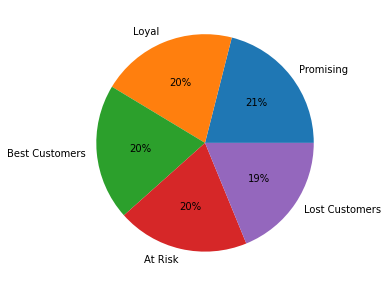

In [ ]:
plt.pie(rfm_df.segment_cust.value_counts(),
        labels=rfm_df.segment_cust.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [ ]:
rfm_df_agg = rfm_df.groupby('segment_cust').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).rename(columns={'Recency':'avg_recency','Frequency':'avg_frequency','Monetary':'avg_monetary'}).round(1)
rfm_df_agg = rfm_df_agg.reset_index()
rfm_df_agg['percent_monetary'] = rfm_df_agg['avg_monetary'].apply(lambda x: (x / rfm_df_agg['avg_monetary'].sum())*100).round(2)
rfm_df_agg

,segment_cust,avg_recency,avg_frequency,avg_monetary,percent_monetary
0,At Risk,24.6,399.6,1206.3,7.59
1,Best Customers,1.7,2485.4,7984.8,50.26
2,Lost Customers,85.8,154.3,472.5,2.97
3,Loyal,6.5,1292.7,3973.4,25.01
4,Promising,14.0,758.0,2249.4,14.16


# Effective Customers and Campaign

In [ ]:
wrap_up = df_final.merge(rfm_df, how='left', on='household_key')
wrap_up

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,DESCRIPTION,Recency,Frequency,Monetary,R,F,M,score_concat,rfm_score,segment_cust
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,16,1,...,-,6,741,2842.89,3,3,3,333,9,Loyal
1,2375,26984851472,1,1033142,1,0.82,364,0.00,16,1,...,-,6,741,2842.89,3,3,3,333,9,Loyal
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,16,1,...,-,6,741,2842.89,3,3,3,333,9,Loyal
3,2375,26984851472,1,1082185,1,1.21,364,0.00,16,1,...,-,6,741,2842.89,3,3,3,333,9,Loyal
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,16,1,...,-,6,741,2842.89,3,3,3,333,9,Loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581348,1598,42305362535,711,92130,1,0.99,3228,0.00,15,102,...,-,0,3546,11516.83,4,4,4,444,12,Best Customers
2581349,1598,42305362535,711,114102,1,8.89,3228,0.00,15,102,...,-,0,3546,11516.83,4,4,4,444,12,Best Customers
2581350,1598,42305362535,711,133449,1,6.99,3228,0.00,15,102,...,-,0,3546,11516.83,4,4,4,444,12,Best Customers
2581351,1598,42305362535,711,6923644,1,4.50,3228,-0.49,15,102,...,-,0,3546,11516.83,4,4,4,444,12,Best Customers


In [ ]:
customer_campaign = wrap_up.groupby(['segment_cust','CAMPAIGN','DESCRIPTION'])['CAMPAIGN'].count().reset_index(name='total_product_redempt')
customer_campaign = customer_campaign[customer_campaign['CAMPAIGN'] != '-']
customer_campaign['CAMPAIGN'] = customer_campaign['CAMPAIGN'].str.replace('.0','',regex=False)
customer_campaign['CAMPAIGN'] = customer_campaign['CAMPAIGN'].astype(np.int64)
customer_campaign

,segment_cust,CAMPAIGN,DESCRIPTION,total_product_redempt
1,At Risk,13,TypeA,13
2,At Risk,18,TypeA,48
3,At Risk,26,TypeA,3
4,At Risk,4,TypeB,1
5,At Risk,8,TypeA,19
...,...,...,...,...
68,Promising,4,TypeB,2
69,Promising,5,TypeB,8
70,Promising,7,TypeB,1
71,Promising,8,TypeA,67


In [ ]:
top_customers = wrap_up[['segment_cust','CAMPAIGN']]
top_customers = top_customers[(top_customers['segment_cust'] == 'Best Customers') & (top_customers['CAMPAIGN'] != '-')]
top_customers['CAMPAIGN'] = top_customers['CAMPAIGN'].str.replace('.0','',regex=False)
top_customers

,segment_cust,CAMPAIGN
626274,Best Customers,26
633839,Best Customers,26
637465,Best Customers,26
637468,Best Customers,26
637481,Best Customers,26
...,...,...
2549546,Best Customers,24
2549549,Best Customers,24
2549556,Best Customers,24
2549557,Best Customers,24


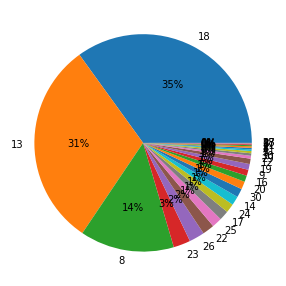

In [ ]:
plt.pie(top_customers.CAMPAIGN.value_counts(),
        labels=top_customers.CAMPAIGN.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [ ]:
high_value_customer = wrap_up[['segment_cust','CAMPAIGN']]
high_value_customer = high_value_customer[(high_value_customer['segment_cust'] == 'Loyal') & (high_value_customer['CAMPAIGN'] != '-')]
high_value_customer['CAMPAIGN'] = high_value_customer['CAMPAIGN'].str.replace('.0','',regex=False)
high_value_customer

,segment_cust,CAMPAIGN
643219,Loyal,26
643230,Loyal,26
666143,Loyal,26
678724,Loyal,26
678728,Loyal,26
...,...,...
2455238,Loyal,25
2455253,Loyal,25
2510181,Loyal,24
2527772,Loyal,24


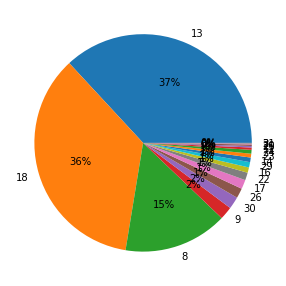

In [ ]:
plt.pie(high_value_customer.CAMPAIGN.value_counts(),
        labels=high_value_customer.CAMPAIGN.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [ ]:
promising_customer = wrap_up[['segment_cust','CAMPAIGN']]
promising_customer = promising_customer[(promising_customer['segment_cust'] == 'Promising') & (promising_customer['CAMPAIGN'] != '-')]
promising_customer['CAMPAIGN'] = promising_customer['CAMPAIGN'].str.replace('.0','',regex=False)
promising_customer

,segment_cust,CAMPAIGN
643041,Promising,26
688733,Promising,26
688735,Promising,26
688740,Promising,26
699972,Promising,26
...,...,...
2324872,Promising,23
2324873,Promising,23
2340482,Promising,22
2451581,Promising,25


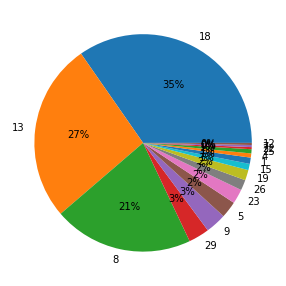

In [ ]:
plt.pie(promising_customer.CAMPAIGN.value_counts(),
        labels=promising_customer.CAMPAIGN.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [ ]:
atrisk_customer = wrap_up[['segment_cust','CAMPAIGN']]
atrisk_customer = atrisk_customer[(atrisk_customer['segment_cust'] == 'At Risk') & (atrisk_customer['CAMPAIGN'] != '-')]
atrisk_customer['CAMPAIGN'] = atrisk_customer['CAMPAIGN'].str.replace('.0','',regex=False)
atrisk_customer

,segment_cust,CAMPAIGN
705399,At Risk,26
705404,At Risk,26
705405,At Risk,26
1221443,At Risk,4
1414368,At Risk,8
...,...,...
2273651,At Risk,18
2273652,At Risk,18
2273653,At Risk,18
2273654,At Risk,18


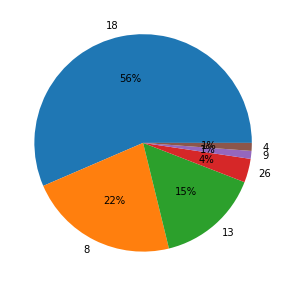

In [ ]:
plt.pie(atrisk_customer.CAMPAIGN.value_counts(),
        labels=atrisk_customer.CAMPAIGN.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [ ]:
lost_customer = wrap_up[['segment_cust','CAMPAIGN']]
lost_customer = lost_customer[(lost_customer['segment_cust'] == 'Lost Customers') & (lost_customer['CAMPAIGN'] == '-')]
lost_customer

,segment_cust,CAMPAIGN
21,Lost Customers,-
22,Lost Customers,-
23,Lost Customers,-
96,Lost Customers,-
121,Lost Customers,-
...,...,...
2555064,Lost Customers,-
2555065,Lost Customers,-
2555066,Lost Customers,-
2555067,Lost Customers,-


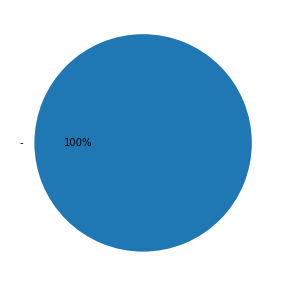

In [ ]:
plt.pie(lost_customer.CAMPAIGN.value_counts(),
        labels=lost_customer.CAMPAIGN.value_counts().index,
        autopct='%.0f%%')
plt.show()

# Compare Best Customers average growth sales when using and not using campaign 18

In [ ]:
top_cust_before_campaign = wrap_up[(wrap_up['CAMPAIGN'] == '-') & (wrap_up['segment_cust'] == 'Best Customers') & ((wrap_up['DAY'] <587) & (wrap_up['DAY'] >530))]

In [ ]:
bc_top_customer = top_cust_before_campaign.groupby('DATE')['SALES_VALUE'].sum()
bc_top_customer = pd.DataFrame(bc_top_customer)
bc_top_customer = bc_top_customer.reset_index()

In [ ]:
bc_top_customer['PCT_OTM'] = bc_top_customer['SALES_VALUE'].pct_change()
bc_top_customer['PCT_OTM'] = (bc_top_customer['PCT_OTM']*100).round(2)

In [ ]:
avg_growth_sales_before_campaign = bc_top_customer['PCT_OTM'].mean()
avg_growth_sales_before_campaign

2.0132727272727275

In [ ]:
top_cust_after_campaign = wrap_up[(wrap_up['segment_cust'] == 'Best Customers') & ((wrap_up['CAMPAIGN'] == '-') | (wrap_up['CAMPAIGN'] == '18.0')) & ((wrap_up['DAY'] >=587) & (wrap_up['DAY'] <=642))]

In [ ]:
ac_top_customer = top_cust_after_campaign.groupby('DATE')['SALES_VALUE'].sum()
ac_top_customer = pd.DataFrame(ac_top_customer)
ac_top_customer = ac_top_customer.reset_index()

In [ ]:
ac_top_customer['PCT_OTM'] = ac_top_customer['SALES_VALUE'].pct_change()
ac_top_customer['PCT_OTM'] = (ac_top_customer['PCT_OTM']*100).round(2)

In [ ]:
avg_growth_sales_campaign = ac_top_customer['PCT_OTM'].mean()
avg_growth_sales_campaign

3.665272727272727

In [ ]:
diff_growth = avg_growth_sales_campaign - avg_growth_sales_before_campaign
diff_growth

1.6519999999999992

In [ ]:
growth_sales = ((((ac_top_customer['SALES_VALUE'].sum())-(bc_top_customer['SALES_VALUE'].sum()))/(bc_top_customer['SALES_VALUE'].sum()))*100).round(2)
growth_sales

10.8

## Compare Best Customers avg growth sales when using and not using campaign 18 in the afternoon

In [ ]:
top_cust_before_campaigns = wrap_up[(wrap_up['CAMPAIGN'] == '-') & (wrap_up['segment_cust'] == 'Best Customers') & (wrap_up['TIMES_CATEGORY'] == 'afternoon') & ((wrap_up['DAY'] <587) & (wrap_up['DAY'] >530))]
top_cust_before_campaigns

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,DESCRIPTION,Recency,Frequency,Monetary,R,F,M,score_concat,rfm_score,segment_cust
1848593,568,35701111036,531,925514,2,0.66,366,-0.53,15,77,...,-,1,2884,8612.85,4,4,4,444,12,Best Customers
1848594,568,35701111036,531,1124729,1,0.34,366,-0.26,15,77,...,-,1,2884,8612.85,4,4,4,444,12,Best Customers
1848595,568,35701111036,531,7152455,1,5.88,366,0.00,15,77,...,-,1,2884,8612.85,4,4,4,444,12,Best Customers
1848596,1453,35701115931,531,1005186,1,2.47,31862,0.00,13,77,...,-,1,6529,21661.29,4,4,4,444,12,Best Customers
1848597,1453,35701115931,531,1138189,1,1.29,31862,0.00,13,77,...,-,1,6529,21661.29,4,4,4,444,12,Best Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066457,2364,40535420436,586,15632175,1,1.69,673,0.00,11,84,...,-,5,2811,7414.10,3,4,4,344,11,Best Customers
2069014,1479,40545416226,586,1053176,1,1.79,410,-0.20,14,84,...,-,2,3319,9129.23,3,4,4,344,11,Best Customers
2069015,1479,40545416226,586,12696183,1,0.34,410,-0.25,14,84,...,-,2,3319,9129.23,3,4,4,344,11,Best Customers
2069016,1479,40545416226,586,12731484,1,0.33,410,-0.26,14,84,...,-,2,3319,9129.23,3,4,4,344,11,Best Customers


In [ ]:
bc_top_customers = top_cust_before_campaigns.groupby('DATE')['SALES_VALUE'].sum()
bc_top_customers = pd.DataFrame(bc_top_customers)
bc_top_customers = bc_top_customers.reset_index()

In [ ]:
bc_top_customers['PCT_OTM'] = bc_top_customers['SALES_VALUE'].pct_change()
bc_top_customers['PCT_OTM'] = (bc_top_customers['PCT_OTM']*100).round(2)

In [ ]:
avg_growth_sales_before_campaigns = bc_top_customers['PCT_OTM'].mean()
avg_growth_sales_before_campaigns

6.476

In [ ]:
top_cust_after_campaigns = wrap_up[(wrap_up['segment_cust'] == 'Best Customers') & (wrap_up['TIMES_CATEGORY'] == 'afternoon') & ((wrap_up['CAMPAIGN'] == '-') | (wrap_up['CAMPAIGN'] == '18.0')) & ((wrap_up['DAY'] >=587) & (wrap_up['DAY'] <=642))]

In [ ]:
ac_top_customers = top_cust_after_campaigns.groupby('DATE')['SALES_VALUE'].sum()
ac_top_customers = pd.DataFrame(ac_top_customers)
ac_top_customers = ac_top_customers.reset_index()

In [ ]:
ac_top_customers['PCT_OTM'] = ac_top_customers['SALES_VALUE'].pct_change()
ac_top_customers['PCT_OTM'] = (ac_top_customers['PCT_OTM']*100).round(2)

In [ ]:
avg_growth_sales_campaigns = ac_top_customers['PCT_OTM'].mean()
avg_growth_sales_campaigns

9.244363636363637

In [ ]:
diff_growths = avg_growth_sales_campaigns - avg_growth_sales_before_campaigns
diff_growths

2.7683636363636372

In [ ]:
growth_sales2 = ((((ac_top_customers['SALES_VALUE'].sum())-(bc_top_customers['SALES_VALUE'].sum()))/(bc_top_customers['SALES_VALUE'].sum()))*100).round(2)
growth_sales2

17.7

## Growth sales in times category

In [ ]:
growthsales_before_t = wrap_up[(wrap_up['CAMPAIGN'] == '-') & ((wrap_up['DAY'] <587) & (wrap_up['DAY'] >530))]
growthsales_before_t = growthsales_before_t.groupby(['segment_cust','DATE','TIMES_CATEGORY'])['SALES_VALUE'].sum()
growthsales_before_t = pd.DataFrame(growthsales_before_t)
growthsales_before_t = growthsales_before_t.reset_index()
growthsales_before_t

,segment_cust,DATE,TIMES_CATEGORY,SALES_VALUE
0,At Risk,2018-06-15,afternoon,318.14
1,At Risk,2018-06-15,evening,276.63
2,At Risk,2018-06-15,morning,91.22
3,At Risk,2018-06-15,night,25.98
4,At Risk,2018-06-16,afternoon,348.03
...,...,...,...,...
1052,Promising,2018-08-08,night,143.95
1053,Promising,2018-08-09,afternoon,1284.30
1054,Promising,2018-08-09,evening,797.04
1055,Promising,2018-08-09,morning,281.00


In [ ]:
growthsales_after_t = wrap_up[((wrap_up['CAMPAIGN'] == '-') | (wrap_up['CAMPAIGN'] == '18.0')) & ((wrap_up['DAY'] >586) & (wrap_up['DAY'] <643))]
growthsales_after_t = growthsales_after_t.groupby(['segment_cust','DATE','TIMES_CATEGORY'])['SALES_VALUE'].sum()
growthsales_after_t = pd.DataFrame(growthsales_after_t)
growthsales_after_t = growthsales_after_t.reset_index()
growthsales_after_t

,segment_cust,DATE,TIMES_CATEGORY,SALES_VALUE
0,At Risk,2018-08-10,afternoon,293.55
1,At Risk,2018-08-10,evening,543.93
2,At Risk,2018-08-10,morning,28.75
3,At Risk,2018-08-11,afternoon,479.40
4,At Risk,2018-08-11,evening,91.87
...,...,...,...,...
1067,Promising,2018-10-03,night,106.42
1068,Promising,2018-10-04,afternoon,1723.65
1069,Promising,2018-10-04,evening,875.89
1070,Promising,2018-10-04,morning,370.81


## How demographic on Best Customers

In [ ]:
hh_demo = pd.read_csv('D:\\Stop is just for LOSER\\Data\\Project\\Revou\\Datasets\\Dunnhumby\\hh_demographic.csv')

In [ ]:
hh_demo.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


## Best Customers Demo

In [ ]:
top_cust = wrap_up[wrap_up['segment_cust'] == 'Best Customers']

In [ ]:
top_custt = top_cust.groupby(['household_key','segment_cust']).agg({'SALES_VALUE':'sum','QUANTITY':'sum'})
top_custt = top_custt.reset_index()
top_custt

,household_key,segment_cust,SALES_VALUE,QUANTITY
0,6,Best Customers,5996.16,94690
1,8,Best Customers,5534.97,68333
2,13,Best Customers,13190.92,1863829
3,18,Best Customers,7118.91,260924
4,19,Best Customers,11299.61,529311
...,...,...,...,...
501,2479,Best Customers,14279.70,366135
502,2481,Best Customers,5403.50,488227
503,2484,Best Customers,7824.64,345374
504,2486,Best Customers,3265.52,51632


In [ ]:
top_cust_merge = hh_demo.merge(top_custt, how='inner', on='household_key')
top_cust_merge['concat'] = top_cust_merge['AGE_DESC'] + ', ' + top_cust_merge['MARITAL_STATUS_CODE'] + ', ' + top_cust_merge['INCOME_DESC'] + ', ' + top_cust_merge['HOMEOWNER_DESC'] + ', ' + top_cust_merge['HH_COMP_DESC'] + ', ' + top_cust_merge['HOUSEHOLD_SIZE_DESC'] + ', ' + top_cust_merge['KID_CATEGORY_DESC']

In [ ]:
top_cust_demo = top_cust_merge.groupby('concat').agg({'SALES_VALUE':'sum','QUANTITY':'sum'})
top_cust_demo = top_cust_demo.reset_index()
top_cust_demo

,concat,SALES_VALUE,QUANTITY
0,"19-24, A, 15-24K, Homeowner, 2 Adults No Kids,...",5159.40,15883
1,"19-24, A, 35-49K, Renter, 2 Adults Kids, 3, 1",5822.64,236900
2,"19-24, A, 35-49K, Renter, 2 Adults No Kids, 2,...",3630.62,37546
3,"19-24, A, 50-74K, Homeowner, 2 Adults Kids, 3, 1",14420.90,5978
4,"19-24, A, 75-99K, Unknown, 2 Adults Kids, 3, 1",6071.52,102543
...,...,...,...
267,"65+, U, 35-49K, Homeowner, Single Female, 1, N...",4377.96,36530
268,"65+, U, 50-74K, Homeowner, 2 Adults No Kids, 2...",8079.95,678427
269,"65+, U, 50-74K, Homeowner, Single Male, 1, Non...",11200.80,16916
270,"65+, U, Under 15K, Homeowner, 1 Adult Kids, 3, 2",11703.97,7340


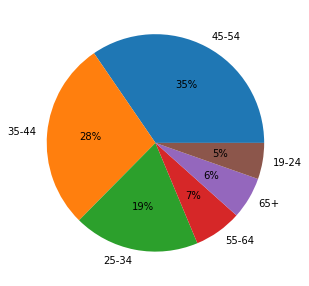

In [ ]:
plt.pie(top_cust_merge.AGE_DESC.value_counts(),
        labels=top_cust_merge.AGE_DESC.value_counts().index,
        autopct='%.0f%%')
plt.show()

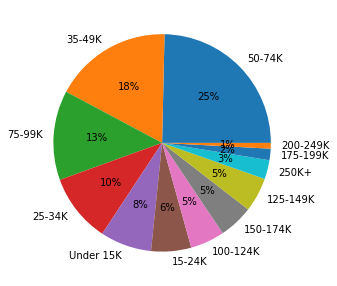

In [ ]:
plt.pie(top_cust_merge.INCOME_DESC.value_counts(),
        labels=top_cust_merge.INCOME_DESC.value_counts().index,
        autopct='%.0f%%')
plt.show()

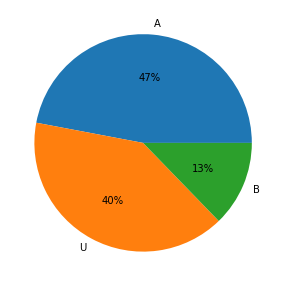

In [ ]:
plt.pie(top_cust_merge.MARITAL_STATUS_CODE.value_counts(),
        labels=top_cust_merge.MARITAL_STATUS_CODE.value_counts().index,
        autopct='%.0f%%')
plt.show()

## Sampling underperforming store for forecasting

In [ ]:
sampling = df_final[df_final['STORE_ID'] == 289]
sampling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19527 entries, 4350 to 2578754
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   household_key         19527 non-null  int64         
 1   BASKET_ID             19527 non-null  int64         
 2   DAY                   19527 non-null  int64         
 3   PRODUCT_ID            19527 non-null  int64         
 4   QUANTITY              19527 non-null  int64         
 5   SALES_VALUE           19527 non-null  float64       
 6   STORE_ID              19527 non-null  int64         
 7   RETAIL_DISC           19527 non-null  float64       
 8   TRANS_TIME            19527 non-null  int64         
 9   WEEK_NO               19527 non-null  int64         
 10  COUPON_DISC           19527 non-null  float64       
 11  COUPON_MATCH_DISC     19527 non-null  float64       
 12  YEAR                  19527 non-null  object        
 13  DAY_NUM    

In [ ]:
sampling1 = sampling[((sampling['MONTH'] == '2018-10 (October)') | (sampling['MONTH'] == '2018-11 (November)') | (sampling['MONTH'] == '2018-12 (December)')) & (sampling['CAMPAIGN'] == '-')]
sampling1 = sampling1.groupby(['STORE_ID','DATE']).agg({'SALES_VALUE':'sum'})
sampling1['PCT_OTM'] = sampling1['SALES_VALUE'].pct_change()
sampling1 = sampling1.reset_index()
sampling1

,STORE_ID,DATE,SALES_VALUE,PCT_OTM
0,289,2018-10-01,120.23,NaN
1,289,2018-10-02,43.17,-0.640938
2,289,2018-10-03,135.64,2.141997
3,289,2018-10-04,62.28,-0.540843
4,289,2018-10-06,27.53,-0.557964
...,...,...,...,...
66,289,2018-12-08,13.23,-0.794533
67,289,2018-12-09,64.45,3.871504
68,289,2018-12-10,79.78,0.237859
69,289,2018-12-11,60.80,-0.237904
